# Flight Causal Inference

In this notebook we will focus on a particular moment in time of the flight and focus on the cause of single variable from the other variables. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import seaborn as sns

In [2]:
df = pd.read_csv("data/666200402020631.csv")
df = df.drop(columns=[df.columns[0]])
df.head()

,VAR_2670,VAR_5107,VAR_6670,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,...,ATEN,LATP,FIRE_1,FIRE_2,FIRE_3,FIRE_4,FGC3,ILSF,ESN_1,ESN_2
0,1465.0,2632.0,3513.0,0.000006,0.001960,-0.000023,-28.488613,-24.507687,79.034841,78.934205,...,-5.199093e-17,41.410048,0.0,0.0,0.0,0.0,120.0,100.0,7889.0,7805.0
1,1465.0,2632.0,3513.0,-0.000007,0.002785,0.000023,-49.740381,-42.089356,6.751757,6.722887,...,-2.599547e-16,41.410048,0.0,0.0,0.0,0.0,120.0,100.0,7889.0,7805.0
2,1465.0,2632.0,3513.0,0.000007,0.003202,-0.000023,-43.547730,-37.325465,27.224032,27.257060,...,-1.733031e-16,41.410048,0.0,0.0,0.0,0.0,120.0,100.0,7889.0,7805.0
3,1465.0,2632.0,3513.0,-0.000007,0.002608,0.000023,-47.318559,-40.029642,15.059799,15.043408,...,-1.386425e-16,41.410048,0.0,0.0,0.0,0.0,120.0,100.0,7889.0,7805.0
4,1465.0,2632.0,3513.0,0.000007,0.003288,-0.000023,-44.565684,-38.190090,23.850340,23.755760,...,-1.391841e-16,41.410048,0.0,0.0,0.0,0.0,120.0,100.0,7889.0,7805.0


We plot a few variables and find that in this time the roll has a spike. It would be good to understand what is the cause of it. Thus the following analysis will be focusing on this variable. 

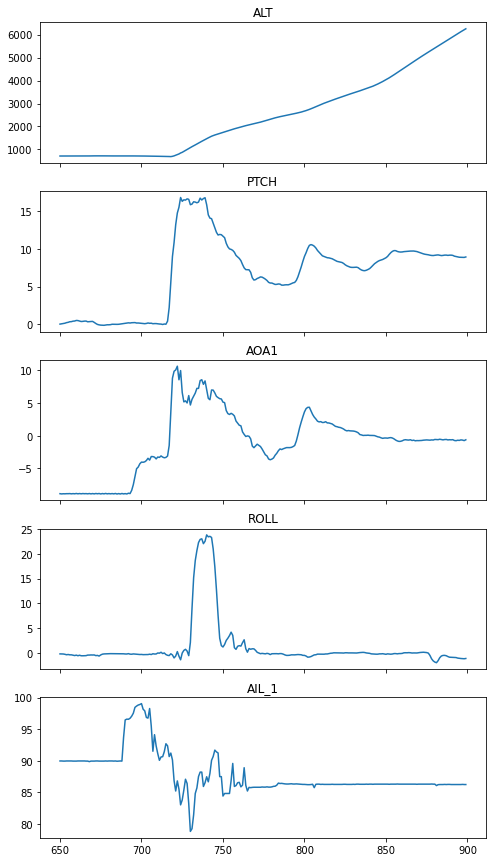

In [3]:
df_flight= df.iloc[650:900]


def flight_plot(df):
    
    fig, axs = plt.subplots(5, sharex=True,figsize=(8,15)) #, sharey=True
    axs[0].plot(df.index, df["ALT"])
    axs[0].set_title("ALT")
    axs[1].plot(df.index, df["PTCH"])
    axs[1].set_title("PTCH")
    axs[2].plot(df.index, df["AOA1"])
    axs[2].set_title("AOA1")
    axs[3].plot(df.index, df["ROLL"])
    axs[3].set_title("ROLL")
    axs[4].plot(df.index, df["AIL_1"])
    axs[4].set_title("AIL_1")
    plt.plot()
    
flight_plot(df_flight)

We now proceed with making the variables stationary. 

In [4]:
# make signals stationary
df_stationary = df_flight.diff().dropna()
print(df_stationary.shape)
# remove columns that with all values 0
df_stationary = df_stationary.loc[:, (df_stationary != 0).any(axis=0)]
print(df_stationary.shape)
df_stationary = df_stationary.loc[:, (abs(df_stationary.mean(axis = 0))>1e-9)]
print(df_stationary.shape)   
    
df_stationary.head()

(249, 185)
(249, 167)
(249, 128)


,FPAC,BLAC,CTAC,TH,MH,EGT_1,EGT_2,EGT_3,EGT_4,IVV,...,ECYC_3,ECYC_4,EHRS_1,DWPT,EHRS_4,EHRS_3,EHRS_2,TMODE,LATP,FGC3
651,-0.000575,-0.000077,0.000459,-0.067824,0.104982,1.212664,-0.018979,0.105268,0.493674,1.990426,...,0.002650,-0.002221,0.000553,1.091394e-11,0.000228,0.000475,0.000553,1.332268e-15,2.131628e-14,-7.105427e-14
652,0.000590,-0.000670,-0.000468,0.010532,-0.162335,1.703144,-0.011967,2.142893,0.744993,-1.466391,...,0.006662,-0.005666,0.001328,-1.091394e-11,0.000546,0.001142,0.001328,-4.440892e-16,0.000000e+00,7.105427e-14
653,-0.000606,0.000833,0.000477,-0.264132,-0.091285,1.945671,0.065298,2.292328,-0.174767,3.207314,...,0.006824,-0.005852,0.001325,0.000000e+00,0.000544,0.001139,0.001325,-4.440892e-16,1.421085e-14,0.000000e+00
654,0.000623,-0.001006,-0.000487,-0.019475,-0.192275,1.255911,-0.633975,2.858405,0.946849,-0.891056,...,0.002946,-0.002561,0.000546,-1.091394e-11,0.000223,0.000470,0.000546,1.332268e-15,1.723253e-04,7.105427e-14
655,-0.000641,0.000920,0.000497,-0.321860,-0.150493,0.767534,-0.573927,1.245657,0.407799,2.049583,...,-0.002775,0.002364,-0.000550,1.091394e-11,-0.000226,-0.000473,-0.000550,0.000000e+00,7.105427e-15,-1.421085e-14


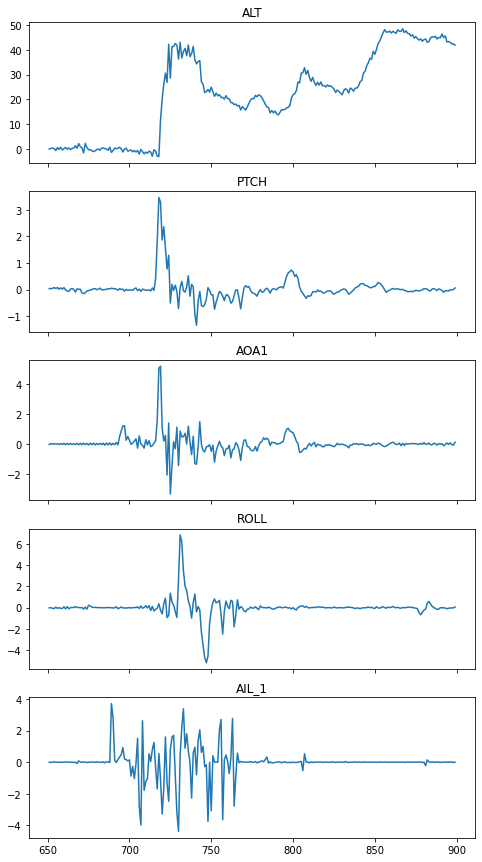

In [5]:
flight_plot(df_stationary)

Here we can see that not all of the variables are stationary with a first order difference. Therefore these variables should  need to go through a second order difference. 

In [6]:
# check non stationary variables
from statsmodels.tsa.stattools import adfuller
non_stationary = []

for column in df_stationary.columns:
    adf_test = adfuller(df_stationary[column])
    if adf_test[1]>0.05:
        non_stationary.append(column)
        
print(non_stationary)

['TRK', 'ALT', 'RALT', 'PSA', 'PI', 'PS', 'PT', 'VIB_3', 'OIT_3', 'OIT_4', 'BAL1', 'BAL2', 'LONP', 'LATP']


We know proceed with the tigramite package to check for the causation of this multivariate problem. 

In [7]:
import tigramite
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.independence_tests import ParCorr, CMIknn, GPDC
from tigramite.pcmci import PCMCI


data = df_stationary.to_numpy()
var_names= df_stationary.columns
df_causal = pp.DataFrame(data, var_names=var_names)

Could not import rpy package
Could not import r-package RCIT


We use a linear method, but other methods are available within the package. We choose 8 as our lag parameter. This changed depending on our needs, but it is always good to check the tigramite correlation function. 

In [8]:
parcorr = ParCorr(significance='analytic')
pcmci = PCMCI(
    dataframe=df_causal,
    cond_ind_test=parcorr,
    verbosity=0)

In [9]:
results = pcmci.run_pcmci(tau_max=8, pc_alpha=0.05)
q_matrix = pcmci.get_corrected_pvalues(p_matrix=results['p_matrix'], fdr_method='fdr_bh')


In [10]:
link_matrix = pcmci.return_significant_parents(pq_matrix=q_matrix,
                        val_matrix=results['val_matrix'], alpha_level=0.01)['link_matrix']

In [11]:
variable_interested="ROLL"
deleted_variables = []
i=0
var_names=list(var_names)
position_var = var_names.index(variable_interested)

for variable in link_matrix:
    if ((True not in variable[position_var,:]) & (i !=position_var)):
        deleted_variables.append(i)
    i+=1

i_link_matrix = np.delete(np.delete(link_matrix, deleted_variables, axis=0),deleted_variables, axis=1)
print(i_link_matrix.shape, link_matrix.shape)
i_val_matrix = np.delete(np.delete(results['val_matrix'], deleted_variables, axis=0), deleted_variables, axis=1)
print(i_val_matrix.shape, results['val_matrix'].shape)
i_var_names= np.delete(var_names, deleted_variables, axis=0)
print(i_var_names)

(21, 21, 9) (128, 128, 9)
(21, 21, 9) (128, 128, 9)
['CTAC' 'WS' 'AOA2' 'ROLL' 'LGUP' 'AOAI' 'AOAC' 'WOW' 'RUDD' 'HDGS' 'ALTS'
 'CASS' 'MNS' 'RUDP' 'AIL_1' 'AIL_2' 'SPL_1' 'ECYC_1' 'ECYC_2' 'ECYC_3'
 'ECYC_4']


In [12]:
i_position_var = list(i_var_names).index(variable_interested)

for row in range(i_link_matrix.shape[1]):
    for array in range(i_link_matrix.shape[0]):
        if row != i_position_var:
            i_link_matrix[array][row]=False

We now plot the links between the variables. For simplicity only the inputs to the ROLL variable are shown. 

<IPython.core.display.Javascript object>


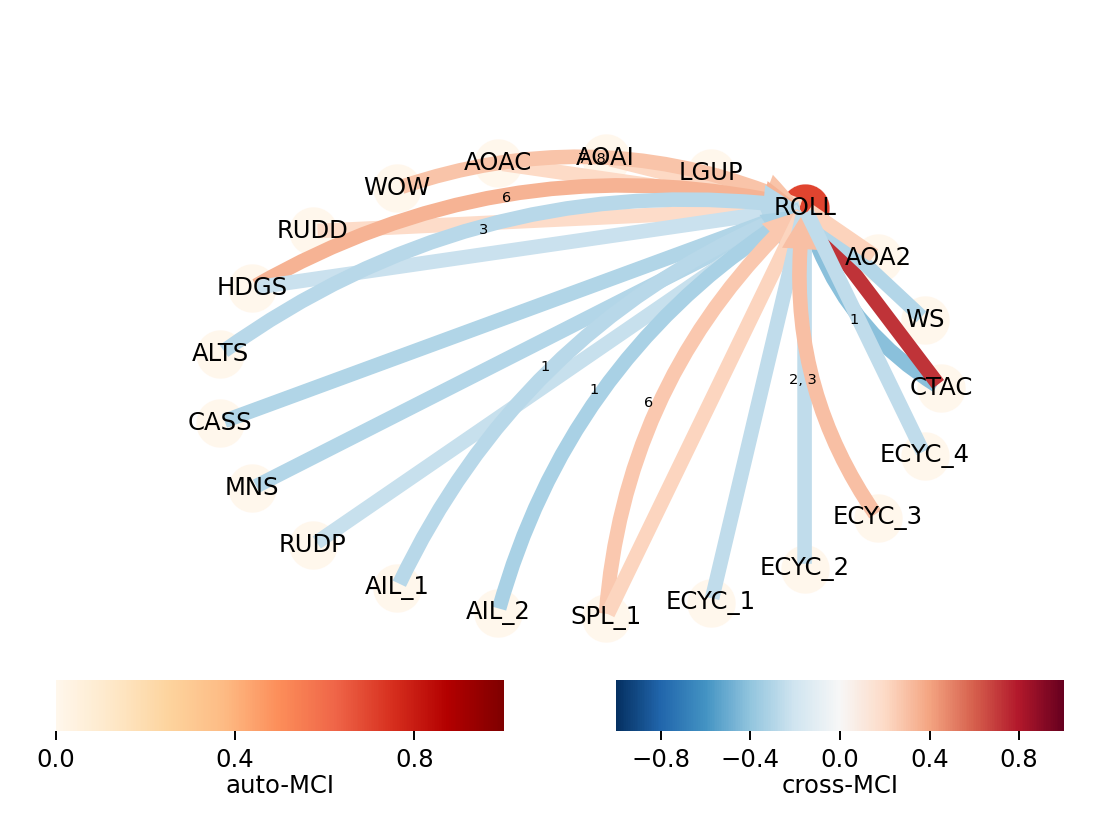

(<Figure size 640x480 with 3 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x272c087c4c8>)

In [13]:
%matplotlib notebook
tp.plot_graph(
    val_matrix=i_val_matrix,
    link_matrix=i_link_matrix,
    var_names=i_var_names,
    link_colorbar_label='cross-MCI',
    node_colorbar_label='auto-MCI',
    )

<IPython.core.display.Javascript object>


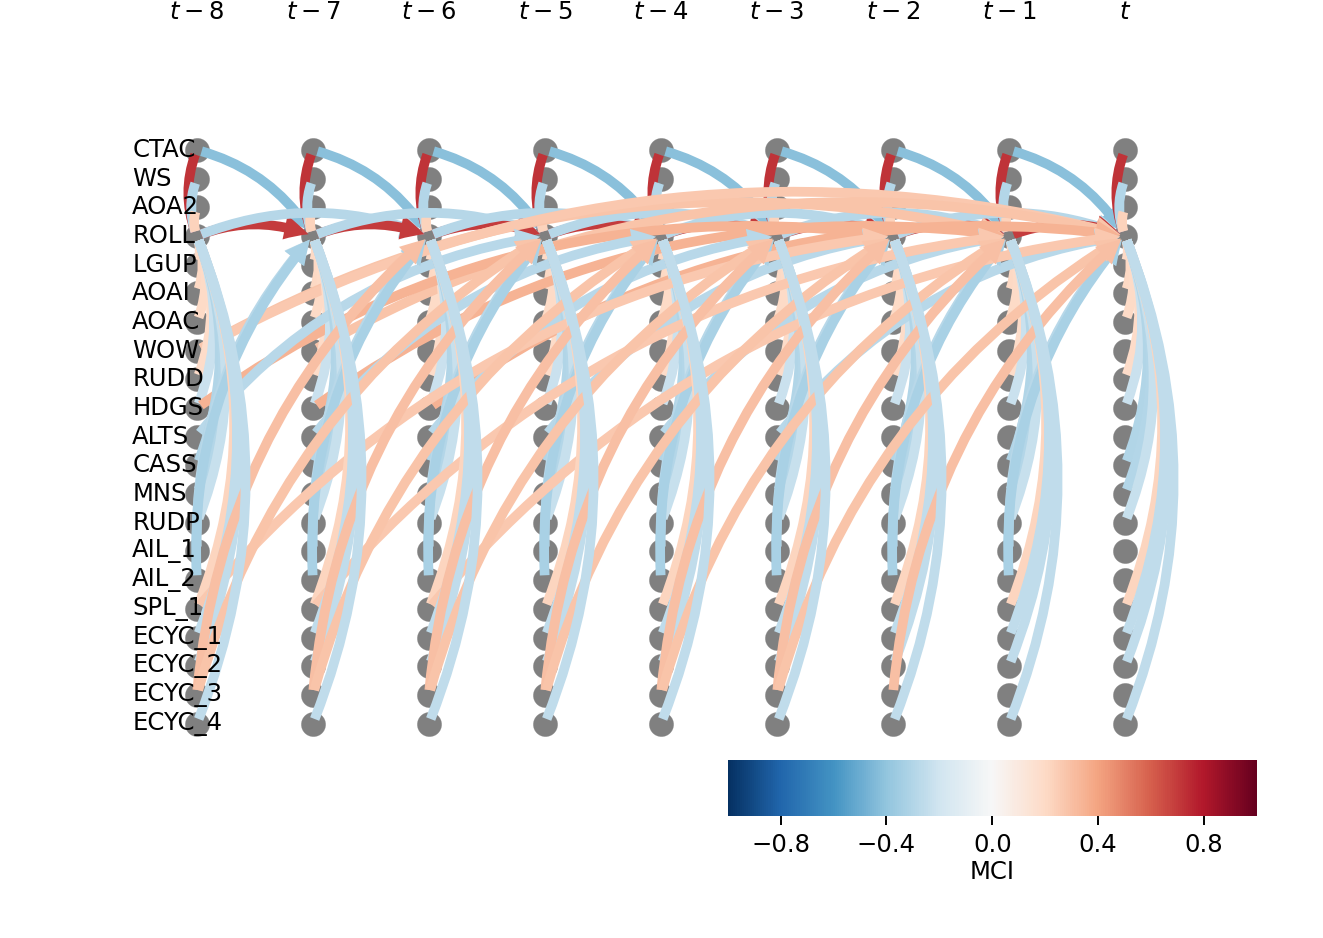

In [14]:
tp.plot_time_series_graph(
    val_matrix=i_val_matrix,
    link_matrix=i_link_matrix,
    var_names=i_var_names,
    link_colorbar_label='MCI',
    )